In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Fourier Series
(or, in other words, approximating functions with sine waves)

## Periodic Signals

A periodic signal can be defined as a function that repeats after some time $T$. In this notebook, we will start with continuous signals, and then move into discrete ones. We do that because it's easier to think about these things in terms of a real, actual signal. A periodic signal can be expressed as

$$x(t) = x(t + T)$$

Theoretically, this equation should hold for a countably infinite number of values of $T$. Makes sense - if a function repeats after some time $T$, it should do that for as many times as we can count. 

The simplest possible periodic signal is a sine wave:

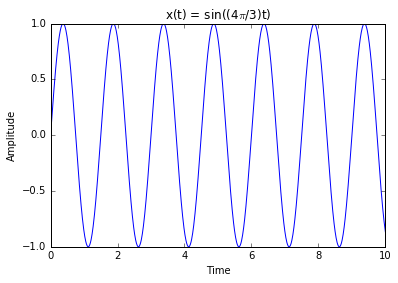

In [19]:
t = np.linspace(0,10,1000)
x = np.sin((4*np.pi/3)*t)

plt.plot(t,x)
plt.title('x(t) = sin((4$\pi$/3)t)')
plt.ylabel('Amplitude')
plt.xlabel('Time')

We can express any sinusoidal wave as

$$x(t) = \sin(\omega_0 t + \phi)$$

Here, $\omega_0$ is the frequency of oscillation of the wave - or how often it repeats. $\phi$ is the phase or "delay" of the wave, or how much it is offset from it's original starting point. For example, in the wave above, our $\omega_0 = \frac{4\pi}{3}$ and our $\phi = 0$. 

Remember that quantity $T$ which defined the period of our wave? It is actually fundamentally related to $\omega_0$:

$$T = \frac{2\pi}{\omega_0}$$

This makes sense - the frequency at which the signal "moves" at is inversely proportional to the amount of time it takes for the signal to "move". If you move at 4 m/s, it would take you 1/4 s to move 1 meter, right? The same principle applies here. (The $2\pi$ term is a factor for sinusoidal signals - see the proof here.)

Proof:
We start with our initial equation:

$$x(t) = x(t + T)$$

Let x(t) be  a normal sinusoidal signal. Then this expression becomes:

$$\sin(\omega_0 t + \phi) = \sin(\omega_0(t + T) + \phi)$$

Since in a sinusoidal signal a period shift is just a shift by $2\pi$, we can express the shift as:

$$\sin(\omega_0 t + \phi + 2k\pi) = \sin(\omega_0(t + T) + \phi)$$

Factoring out an $\omega_0$, we find our expression to be:

$$\sin(\omega_0(t + \frac{2k\pi}{\omega_0}) + \phi) = \sin(\omega_0(t + T) + \phi)$$

For $k = 1$, we see that our period $T$ is equivalent to

$$T = \frac{2\pi}{\omega_0}$$

This $\omega_0$, for $k = 1$, is known as the fundamental angular frequency. We refer to $\omega_0 = \frac{2\pi}{T}$ as the fundamental angular frequency of any signal that is periodic with fundamental period $T$.

### Properties of Periodic Signals

One very neat property of any (continuous or discrete) signal is that any two signals with the same period $T$ can be added together to find a resulting signal with the same period $T$:

$$s(t) = x(t) + y(t)$$
$$s(t + T) = x(t + T) + y(t + T) = s(t + T)$$

We note that any two signals which have the same period have to have the same fundamental angular frequencies. This is important - what if we have different muliples of $k$? Remember from above 

$$\sin(\omega_0 t + 2k\pi) = \sin(\omega(t + T))$$ 

(assuming no phase shift, it doesn't matter here anyways). Looking at this, it seems possible that two different sinusoidal signals can have the same period. This doesn't seem to make a lot of sense, so we'll look at an example.

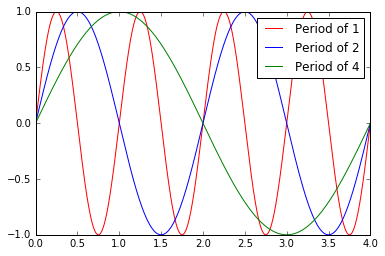

In [18]:
t = np.linspace(0,4,1000)
x1 = np.sin((2*np.pi)*t)
x2 = np.sin((np.pi)*t)
x3 = np.sin((0.5*np.pi)*t)

plt1, = plt.plot(t,x1,'r', label = 'Period of 1')
plt2, = plt.plot(t,x2,'b', label = 'Period of 2')
plt3, = plt.plot(t,x3,'g', label = 'Period of 4')

plt.legend(handles = [plt1, plt2, plt3])

Each frequency is an integer multiple of the "base" frequency. This is useful for us - we can approximate different signals by just using integer multiples of the original frequency. These sinusoidal signals are called harmonically-related sinusoids. They share the same "overall" period in that all of the start and end at the same time, but have different fundamental periods (which depend on the frequency.

### Complex Signals

I'm sure you've all heard of the theorem:

$$e^{-i\pi} = -1$$

Turns out Euler's theorem also has a use in signal processing:

$$x(t) = e^{j(\omega_0 t + \phi)} = \cos(\omega_0 t + \phi) + j\sin(\omega_0 t + \phi)$$

Factoring the phase out, we get:

$$x(t) = ce^{j\omega_0 t}$$

This same signal has the same properties as described above, because it is a sinusoidal signal - just one extended out to the complex plane.

## Applications of Periodic Signals

If we just add a bunch of harmonically-related sinusoidal signals, it turns out we can approximate almost any signal. For example, let's look at a square-wave on the interval [0,1]:

$$x(t) = \left\{
        \begin{array}{ll}
            1 & \quad 0 \leq t \leq 0.5 \\
            -1 & \quad \text{else}
        \end{array}
    \right.$$

And a plot:

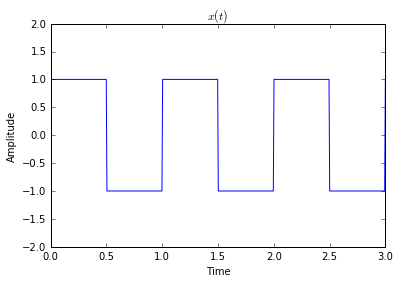

In [33]:
t = np.linspace(0, 3, 500)
plt.plot(t, signal.square(2 * np.pi * t))
plt.ylim(-2,2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('$x(t)$')

It turns out that by adding a bunch of sine waves together, we can get something approximating this function. The summation is called the Fourier series. See the ending of this notebook for the proof of this Fourier equation, but the general equation for the Fourier series coefficients is, given some function $x(t)$ with some period T:

$$X[k] = \frac{1}{T}\int_0^T x(t)e^{-j \frac{2\pi k t}{T}} dT$$

After generating the Fourier series coefficients, we can write out the actual summation that leads to our signal in question:

$$x'(t) = \sum_{k = -\infty}^N X[k]e^{j \frac{2\pi k t}{T}}$$

Generally, as $N \rightarrow \infty$, we get our original function back:

$$\lim_{N \rightarrow \infty} x'(t) = x(t)$$

Let's try to approximate it for our sine wave. Plugging in to find our coefficients, we see that:

$$X[k] = \frac{1}{T}\int_0^1 x(t)e^{-j \frac{2\pi k t}{T}} dT$$
$$ = \int_0^{0.5} e^{-j 2\pi k t}dt - \int_{0.5}^1 e^{-j 2\pi k t}dt$$
$$ = \frac{-1}{j2\pi k} ([e^{-j\pi k} -1] - [1 - e^{-j\pi k}])$$
$$ = \frac{-1}{j2\pi k} 2[(-1)^k -1] $$
$$ = \left\{
        \begin{array}{ll}
            0 & \quad \text{k even} \\
            \frac{2}{j\pi k} & \quad \text{k odd}
        \end{array}
    \right.$$

Afterward, we can plug our Fourier series coefficients to get our Fourier series:

$$x'(t) = \sum_{k=-\infty}^N X[k]e^{j2\pi k}$$
$$ = \sum_{k=1}^N X[k](e^{j2\pi k t} - e^{-j2\pi k t})$$
$$ = \sum_{k=1}^N \frac{1}{k} \sin(2\pi k t)$$

A plot confirms this:

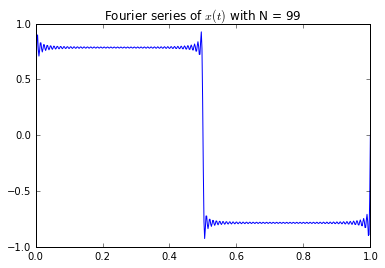

In [65]:
N = 101

t = np.linspace(0,1,500)
xprime = sum([1.0/k * np.sin(2*np.pi*k*t) for k in range(1,N,2)])

plt.plot(t,xprime)
plt.title('Fourier series of $x(t)$ with N = 99')

We can see how the number of coefficients determines the accuracy of the Fourier series:

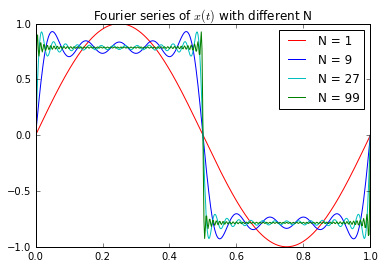

In [64]:
N2 = 3
N3 = 11
N4 = 29
N5 = 101

t = np.linspace(0,1,500)

xprime2 = sum([1.0/k * np.sin(2*np.pi*k*t) for k in range(1,N2,2)])
xprime3 = sum([1.0/k * np.sin(2*np.pi*k*t) for k in range(1,N3,2)])
xprime4 = sum([1.0/k * np.sin(2*np.pi*k*t) for k in range(1,N4,2)])
xprime5 = sum([1.0/k * np.sin(2*np.pi*k*t) for k in range(1,N5,2)])

plt1, = plt.plot(t,xprime2,'r', label = 'N = 1')
plt2, = plt.plot(t,xprime3,'b', label = 'N = 9')
plt3, = plt.plot(t,xprime4,'c', label = 'N = 27')
plt4, = plt.plot(t,xprime5,'g', label = 'N = 99')

plt.legend(handles=[plt1,plt2,plt3,plt4])
plt.title('Fourier series of $x(t)$ with different N')

The approximation gets much better as we increase the number of coefficients!